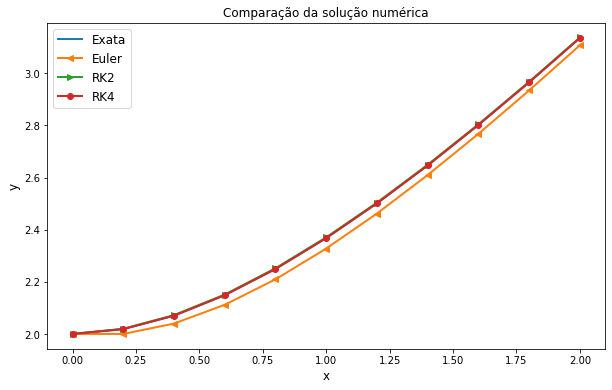


Erro euler: 4.8202e-02
Erro RK2: 3.4577e-03
Erro RK4: 7.0034e-06


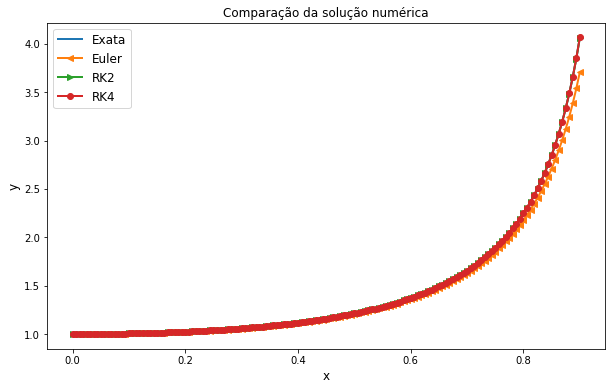


Erro euler: 6.2367e-02
Erro RK2: 6.1593e-04
Erro RK4: 5.3947e-08


In [ ]:
import numpy as np
from scipy import linalg as lin
from scipy import integrate as odesolver
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time

def euler_edo(x,h,f,y0):
    n = len(x);
    y = np.zeros(n);
    y[0] = y0;

    for i in np.arange(1,n):
        y[i] = y[i-1] + h*f(x[i-1],y[i-1]);

    return y;

def rk2(x,h,f,y0):
    n = len(x);
    y = np.zeros(n);
    y[0] = y0;

    for i in np.arange(1,n):
        k1 = f(x[i-1],y[i-1]);
        k2 = f(x[i-1]+h,y[i-1]+h*k1);

        y[i] = y[i-1] + (h/2)*(k1+k2);

    return y;

def rk4(x,h,f,y0):
    n = len(x);
    y = np.zeros(n);
    y[0] = y0;

    for i in np.arange(1,n):
        k1 = f(x[i-1],y[i-1]);
        k2 = f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1);
        k3 = f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2);
        k4 = f(x[i-1]+h,y[i-1]+h*k3);

        y[i] = y[i-1] + (h/6)*(k1+2*(k2+k3)+k4);

    return y;

def calc_erro_2(x,h,y,f_exa):
    e = np.abs(y-f_exa(x));
    e = e**2;
    erro = np.sqrt(h*np.sum(e))

    return erro;

# Exemplo linear
f = lambda x,y: -y + x + 2;
f_exa = lambda x: np.exp(-x) + x + 1;

y0 = 2;
h = 0.2;
n = int((2-0)/h);
x = np.linspace(0,2,n+1,endpoint=True);

y_euler = euler_edo(x,h,f,y0);
y_rk2 = rk2(x,h,f,y0);
y_rk4 = rk4(x,h,f,y0);

# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,f_exa(x),label = 'Exata',linewidth = 2)
plt.plot(x,y_euler,label = 'Euler',linewidth = 2,marker='<')
plt.plot(x,y_rk2,label = 'RK2',linewidth = 2,marker='>')
plt.plot(x,y_rk4,label = 'RK4',linewidth = 2,marker='o')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação da solução numérica') 
plt.legend(fontsize='large') 
plt.show()

# Cálculo de erros
erro_euler = calc_erro_2(x,h,y_euler,f_exa);
erro_rk2 = calc_erro_2(x,h,y_rk2,f_exa);
erro_rk4 = calc_erro_2(x,h,y_rk4,f_exa);

print('\nErro euler: %.4e'%(erro_euler));
print('Erro RK2: %.4e'%(erro_rk2));
print('Erro RK4: %.4e'%(erro_rk4));

# Exemplo não-linear, equação de Bernoulli

f = lambda x,y: np.exp(x)*y**2 - y;
f_exa = lambda x: np.exp(-x)/(1-x);

y0 = 1;
h = 0.1/16;
n = int((0.9-0)/h);
x = np.linspace(0,0.9,n+1,endpoint=True);

y_euler = euler_edo(x,h,f,y0);
y_rk2 = rk2(x,h,f,y0);
y_rk4 = rk4(x,h,f,y0);

# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,f_exa(x),label = 'Exata',linewidth = 2)
plt.plot(x,y_euler,label = 'Euler',linewidth = 2,marker='<')
plt.plot(x,y_rk2,label = 'RK2',linewidth = 2,marker='>')
plt.plot(x,y_rk4,label = 'RK4',linewidth = 2,marker='o')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação da solução numérica') 
plt.legend(fontsize='large') 
plt.show()

# Cálculo de erros
erro_euler = calc_erro_2(x,h,y_euler,f_exa);

erro_rk2 = calc_erro_2(x,h,y_rk2,f_exa);
erro_rk4 = calc_erro_2(x,h,y_rk4,f_exa);

print('\nErro euler: %.4e'%(erro_euler));
print('Erro RK2: %.4e'%(erro_rk2));
print('Erro RK4: %.4e'%(erro_rk4));